## 연관규칙과 협업필터링

### 연관규칙

- 1. Apriori

중요 지표

|지표|설명|수식|
|--|--|--|
|Support|A,B 모두 포함확률|$\text{Support}(A) $= $\frac{\text{Transactions containing } A}{\text{Total number of transactions}} $|
|confidence|A->B(A거래에 B가 포함되어있는 확률)|$\text{Confidence}(A \rightarrow B)$ = $\frac{\text{Support}(A \cap B)}{\text{Support}(A)}$|
|lift|A,B가 독립적으로 팔리는 것 대비 함께 팔리는 비율|$\text{Lift}(A \rightarrow B)$ = $\frac{\text{Confidence}(A \rightarrow B)}{\text{Support}(B)}$|

평가지표

- 1. interset-support

$\text{IS(A,B)}$ = $\sqrt{\text lift(A,B)*\text support(A,B)}$

- 2. cross-support

$sub-ratio(P)$=$\frac{min({\text Support(i_1),Support(i_2),...})}{max({\text Support(i_1),Support(i_2),...})}$

## 콘텐츠 기반 추천 알고리즘

- 1. neighborhood model(based on 'customers', based on 'items')
- 2. latent factor model

### 1. Neighborhood medel

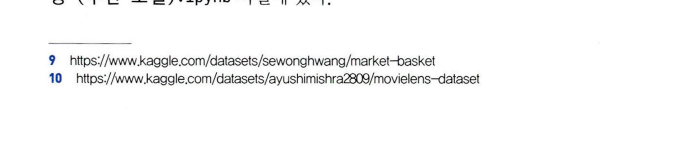

In [1]:
import pandas as pd
movie=pd.read_csv(r"C:\Users\SAMSUNG\Desktop\공부파일들\excel\kaggle\movies.csv")
basket=pd.read_csv(r"C:\Users\SAMSUNG\Desktop\공부파일들\excel\kaggle\market_basket.csv")

In [2]:
items=pd.DataFrame(basket.drop_duplicates(["cust_cd","std_dt","prdct_nm"]).groupby(["cust_cd","std_dt"])['prdct_nm'].apply(list))

In [3]:
items=items.reset_index().drop(["cust_cd","std_dt"],axis=1)

In [4]:
items.squeeze()

0        [beef, herbs, tropical fruit, whole milk, chic...
1        [sugar, packaged fruit/vegetables, sausage, sp...
2        [berries, tropical fruit, fruit/vegetable juic...
3        [yogurt, beef, cream, herbs, chicken, bottled ...
4        [berries, beef, yogurt, specialty bar, bottled...
                               ...                        
27214             [cream, turkey, dessert, tropical fruit]
27215                [pastry, detergent, pip fruit, pasta]
27216    [dog food, sausage, chocolate, pasta, fruit/ve...
27217    [tropical fruit, processed cheese, hamburger m...
27218    [butter milk, brown bread, chicken, frozen pot...
Name: prdct_nm, Length: 27219, dtype: object

---------

In [5]:
import mlxtend
import mlxtend.preprocessing as mxtpre

In [6]:
model=mxtpre.TransactionEncoder()

In [7]:
df=model.fit(items.squeeze()).transform(items.squeeze())

In [8]:
pd.DataFrame(df,columns=model.columns_)

,beef,berries,beverages,bottled beer,bottled water,brown bread,butter,butter milk,canned beer,chicken,...,sparkling wine,specialty bar,specialty chocolate,sugar,syrup,tropical fruit,turkey,white wine,whole milk,yogurt
0,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False
2,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,True,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,True,True,False,False,True,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
27215,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27216,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27217,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False


아직까진 모듈 쓰는 이유를..

---------

In [9]:
import mlxtend.frequent_patterns as mlxfre
apriori=mlxfre.apriori()

ModuleNotFoundError: No module named 'distutils'